# Explore infant births/deaths from CDC

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd

warnings.filterwarnings('ignore')

In [2]:
def plot_time(df, time_type, label):
    fig, ax = plt.subplots(1, 3, figsize=(24, 4))
    for ii, column in enumerate(['Births', 'Deaths', 'Death Rate']):
        # Filter out suppressed or unreliable data
        temp = df[df[column] != 'Suppressed']
        temp['trim'] = temp.apply(lambda row: 'Unreliable' in str(row[column]), axis=1)
        temp = temp[temp['trim'] == False]
        temp[column] = temp[column].astype('float')

        # Plot distribution by time
        vals = []
        for time in temp[time_type].unique():
            temp_sub = temp[temp[time_type] == time]
            vals.append(temp_sub[column])
        ax[ii].boxplot(vals)
        ax[ii].set_xlabel(label)
        ax[ii].set_ylabel(column) 

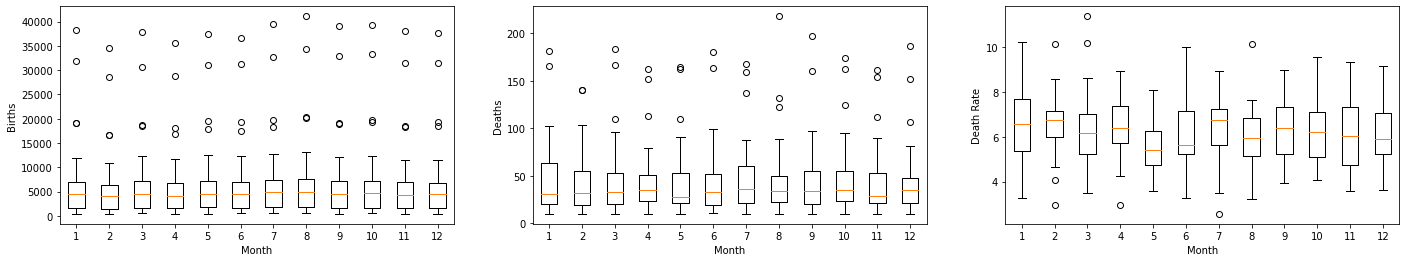

In [3]:
# Are there any trends by month?
months = pd.read_csv('../data/CDC/months.txt', sep='\t')
months.drop(columns='Notes', inplace=True)
months = months[months['State'].isna() == False]
plot_time(months, 'Month Code', 'Month')

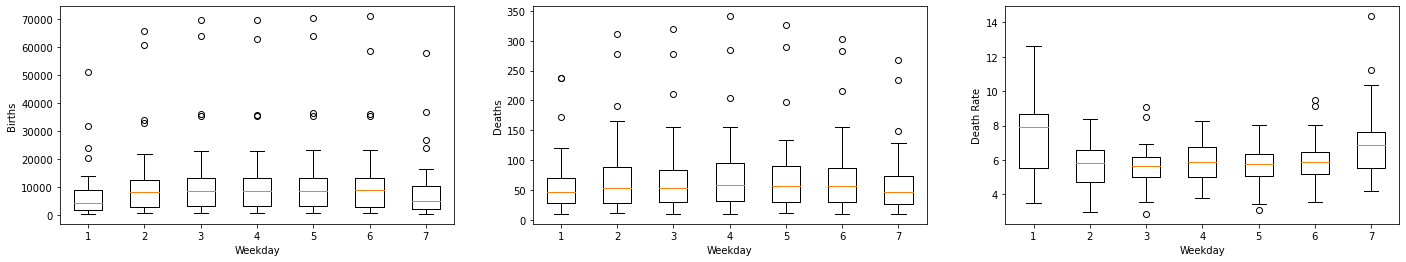

In [4]:
# Are there any trends by day?
days = pd.read_csv('../data/CDC/weekdays.txt', sep='\t')
days.drop(columns='Notes', inplace=True)
days = days[days['State'].isna() == False]
plot_time(days, 'Weekday Code', 'Weekday')

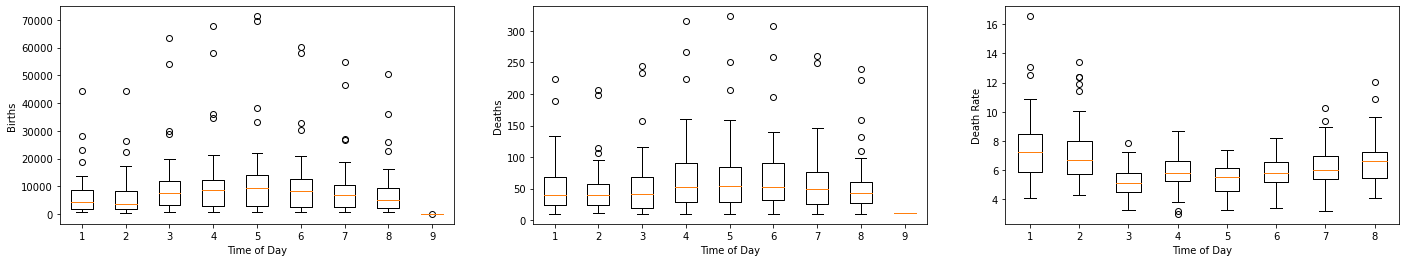

In [5]:
# Are there any trends by hour?
hours = pd.read_csv('../data/CDC/hours.txt', sep='\t')
hours.drop(columns='Notes', inplace=True)
hours = hours[hours['State'].isna() == False]
plot_time(hours, 'Time of Day Code', 'Time of Day')

In [6]:
# Are the difference in death rates by month, day, or hour statistically significant?
# - Is the difference between weekday/weekend or day/night statistically significant?
# Could we create a model to fill in the missing data, and create an interactive visualization?
# Are these trends consistent across states?